In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

In [2]:
data_sampah = pd.read_csv("Data/data_sampah.csv")
data_gaji_pengeluaran = pd.read_excel("Data/data_gaji_pengeluaran.xlsx")

### Dataset Information

In [3]:
data_sampah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   No                              60 non-null     int64  
 1   Bulan                           60 non-null     object 
 2   Tonase (Ton)                    60 non-null     float64
 3   Ritasi (Rit)                    60 non-null     int64  
 4   Kompensasi Jasa Pelayanan (Rp)  60 non-null     int64  
 5   Kompensasi Dampak Negatif (Rp)  60 non-null     int64  
 6   Tahun                           60 non-null     int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 3.4+ KB


In [4]:
data_gaji_pengeluaran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column                                        Non-Null Count  Dtype
---  ------                                        --------------  -----
 0   Tahun                                         5 non-null      int64
 1   UMK Kota Bandung (Rp)                         5 non-null      int64
 2   Rata-rata Pengeluaran Perkapita Sebulan (Rp)  5 non-null      int64
dtypes: int64(3)
memory usage: 248.0 bytes


### Statistical Description of the Dataset

In [5]:
data_sampah.describe(include="all")

,No,Bulan,Tonase (Ton),Ritasi (Rit),Kompensasi Jasa Pelayanan (Rp),Kompensasi Dampak Negatif (Rp),Tahun
count,60.000000,60,60.000000,60.000000,6.000000e+01,6.000000e+01,60.000000
unique,NaN,12,NaN,NaN,NaN,NaN,NaN
top,NaN,Januari,NaN,NaN,NaN,NaN,NaN
freq,NaN,5,NaN,NaN,NaN,NaN,NaN
mean,6.500000,NaN,38617.701167,7687.933333,1.925582e+09,3.958270e+08,2019.000000
std,3.481184,NaN,3721.271641,593.842097,1.986256e+08,4.560680e+07,1.426148
min,1.000000,NaN,25235.730000,6065.000000,1.215454e+09,2.703232e+08,2017.000000
25%,3.750000,NaN,37387.777000,7394.250000,1.869389e+09,3.848965e+08,2018.000000
50%,6.500000,NaN,39619.146000,7753.000000,1.980957e+09,4.048931e+08,2019.000000
75%,9.250000,NaN,41125.805000,8168.000000,2.056290e+09,4.288493e+08,2020.000000


In [6]:
data_gaji_pengeluaran.describe(include="all")

,Tahun,UMK Kota Bandung (Rp),Rata-rata Pengeluaran Perkapita Sebulan (Rp)
count,5.000000,5.000000e+00,5.000000e+00
mean,2019.000000,3.328128e+06,1.811569e+06
std,1.581139,3.707533e+05,2.701567e+05
min,2017.000000,2.843662e+06,1.491757e+06
25%,2018.000000,3.091345e+06,1.550533e+06
50%,2019.000000,3.339580e+06,1.958841e+06
75%,2020.000000,3.623778e+06,1.974339e+06
max,2021.000000,3.742276e+06,2.082375e+06


Tidak terdapat keanehan dalam ringkasan parameter statistik yang ada. Feature No pada data sampah merupakan Urutan Bulan yang ada 1 menunjukan Januari sampai maximal 12 menunjukkan Desember

In [7]:
data_sampah = pd.merge(data_sampah, data_gaji_pengeluaran, on='Tahun')

### Exploratory Data Analysis (EDA)
#### 1. Correlation Matrix

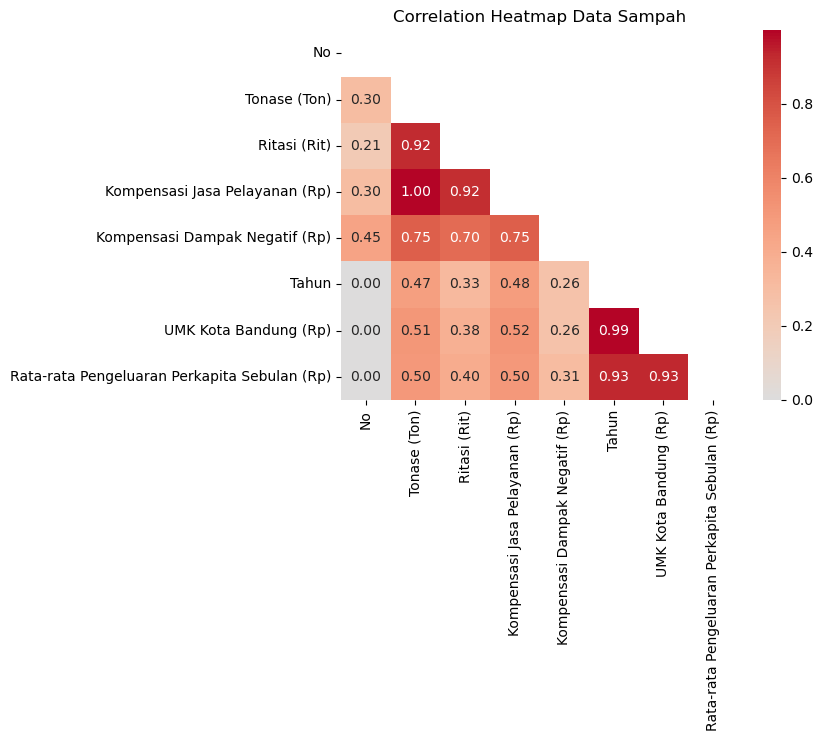

In [8]:
correlation_matrix = data_sampah.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation Heatmap Data Sampah")
plt.show()

Feature yang memiliki korelasi positive yang kuat yaitu
- Tonase (Ton) dengan Kompensasi Jasa Pelayanan
- Tonase (Ton) dengan Ritasi (Rit)
- Ritasi (Rit) dengan Kompensasi Jasa Pelayanan

Semakin warnanya memerah atau nilainya mendekati 1 berarti antar kedua fitur tersebut memiliki korelasi positive yang sangat kuat

#### 2. Scatter Plot

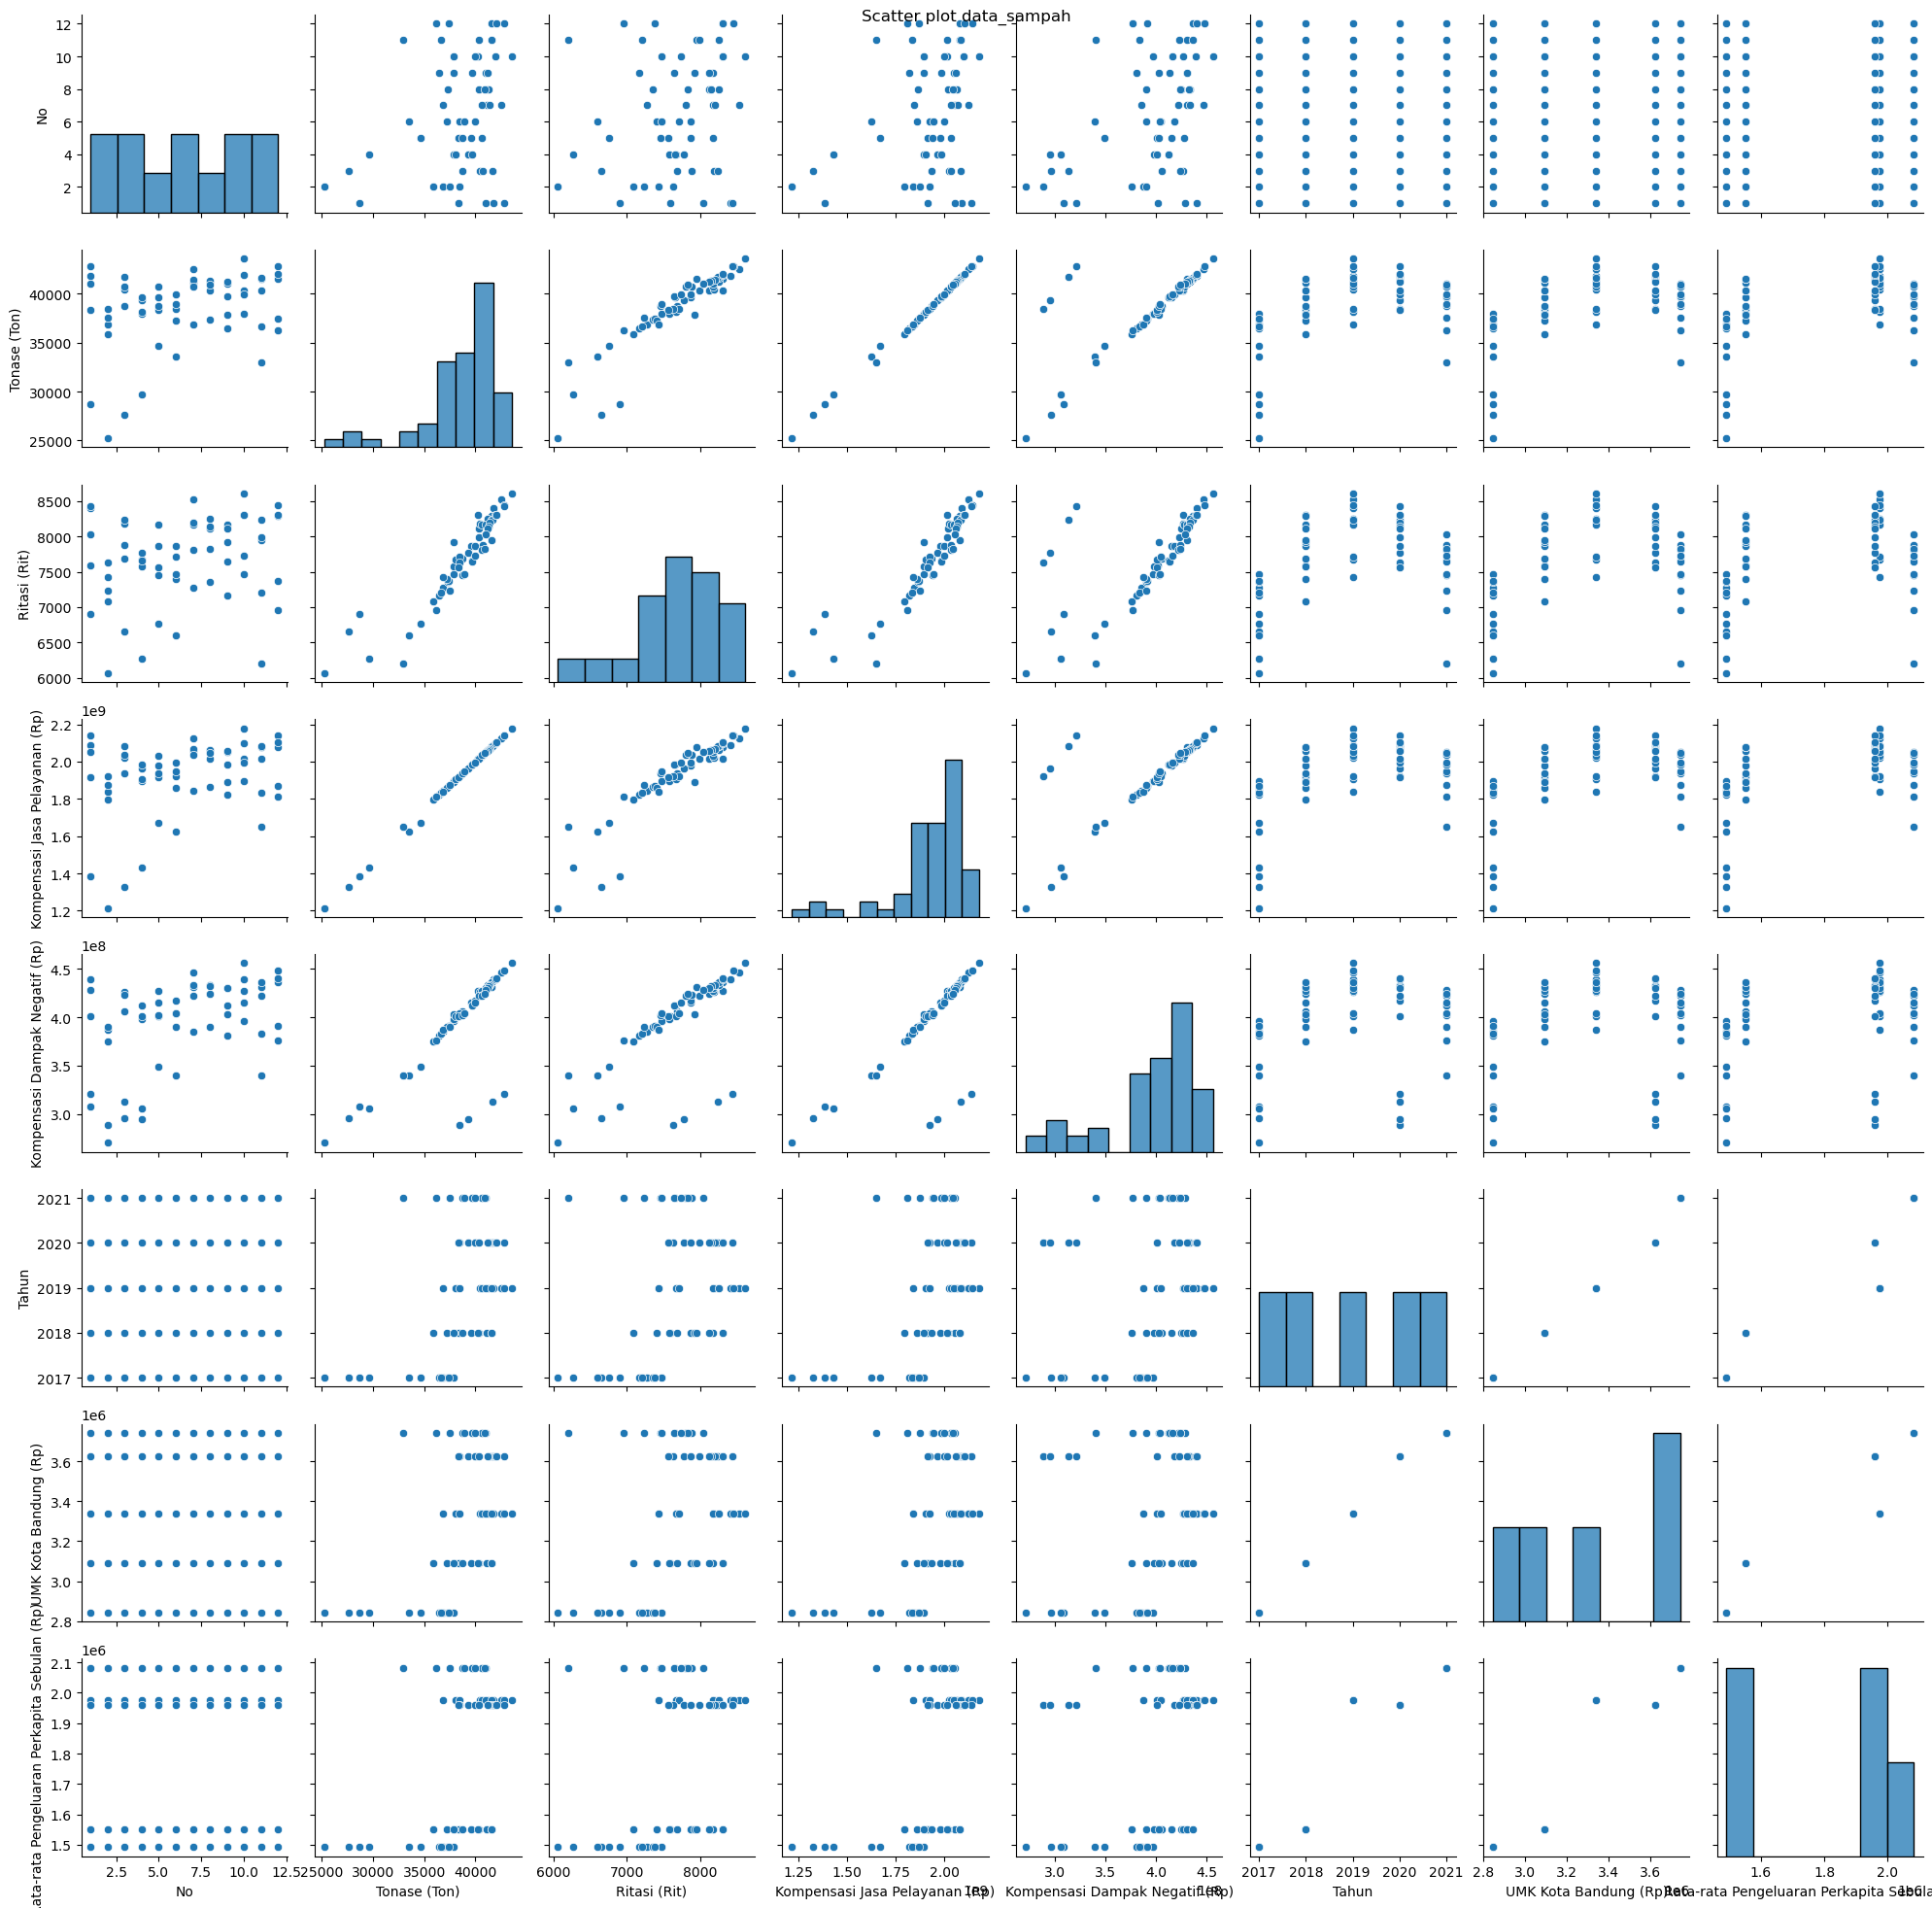

In [9]:
g = sns.pairplot(data_sampah)
g.fig.suptitle("Scatter plot data_sampah")
plt.tight_layout()
plt.show()

Berikut gambar Scatter Plot antar tiap Feature yang ada Dimana seperti yang kita tau sebelumnya menggunakan correlation matrix pada feature Tonase (Ton) dengan Kompensasi Jasa Pelayanan (Rp) memiliki korelasi positive yang kuat atau bernilai 1 karena dilihat dari Scatter Plot nya membentuk garis lurus pada hubungan linearnya

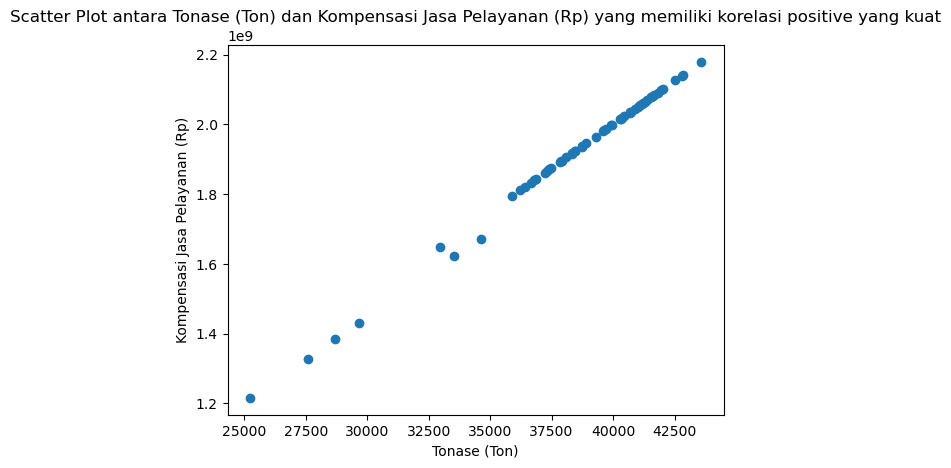

In [10]:
plt.scatter(data_sampah["Tonase (Ton)"], data_sampah["Kompensasi Jasa Pelayanan (Rp)"])
plt.xlabel("Tonase (Ton)")
plt.ylabel("Kompensasi Jasa Pelayanan (Rp)")
plt.title("Scatter Plot antara Tonase (Ton) dan Kompensasi Jasa Pelayanan (Rp) yang memiliki korelasi positive yang kuat")
plt.show()

In [11]:
data_sampah['KenaikanPenurunanTonase (Ton)'] = data_sampah['Tonase (Ton)'].diff()
data_sampah['KenaikanPenurunanTonase (%)'] = data_sampah['Tonase (Ton)'].pct_change() * 100
data_sampah['KenaikanPenurunanTonase (%)'] = data_sampah['KenaikanPenurunanTonase (%)'].round(2)

# Mengganti urutan kolom
data_sampah = data_sampah[['No', 'Bulan','Tahun','Tonase (Ton)', 'KenaikanPenurunanTonase (Ton)', 
                           'KenaikanPenurunanTonase (%)','Ritasi (Rit)', 'Kompensasi Jasa Pelayanan (Rp)',
                           'Kompensasi Dampak Negatif (Rp)', 'UMK Kota Bandung (Rp)',
                           'Rata-rata Pengeluaran Perkapita Sebulan (Rp)']]
data_sampah

,No,Bulan,Tahun,Tonase (Ton),KenaikanPenurunanTonase (Ton),KenaikanPenurunanTonase (%),Ritasi (Rit),Kompensasi Jasa Pelayanan (Rp),Kompensasi Dampak Negatif (Rp),UMK Kota Bandung (Rp),Rata-rata Pengeluaran Perkapita Sebulan (Rp)
0,1,Januari,2017,28695.810,NaN,NaN,6901,1384246500,307911975,2843662,1491757
1,2,Februari,2017,25235.730,-3460.080,-12.06,6065,1215454500,270323175,2843662,1491757
2,3,Maret,2017,27581.190,2345.460,9.29,6653,1325941500,295281225,2843662,1491757
3,4,April,2017,29664.735,2083.545,7.55,6264,1430830450,305629567,2843662,1491757
4,5,Mei,2017,34637.092,4972.357,16.76,6761,1670736200,348815430,2843662,1491757
5,6,Juni,2017,33537.532,-1099.560,-3.17,6598,1622184200,339417630,2843662,1491757
6,7,Juli,2017,36864.296,3326.764,9.92,7271,1843214800,385547220,2843662,1491757
7,8,Agustus,2017,37320.304,456.008,1.24,7355,1866015200,390227280,2843662,1491757
8,9,September,2017,36420.664,-899.640,-2.41,7161,1821033200,380569980,2843662,1491757
9,10,Oktober,2017,37908.640,1487.976,4.09,7472,1895432000,396394800,2843662,1491757


### Visualization & Explanatory Analysis

Bagaimana Pola terkait Jumlah Tonase Sampah yang terjadi pada Kota Bandung

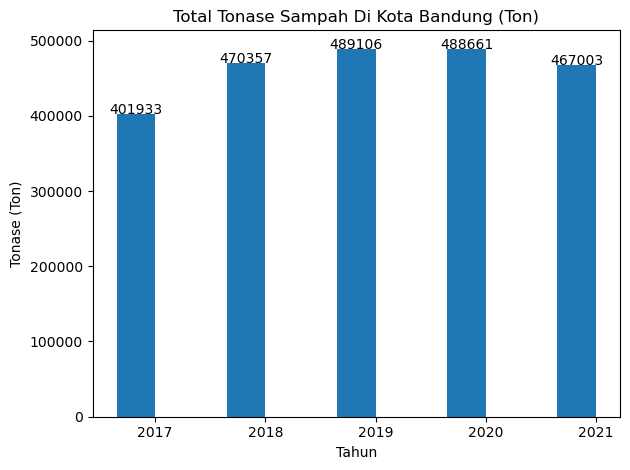

In [12]:
ttl_sampah_tahunan = data_sampah.groupby("Tahun")["Tonase (Ton)"].sum()
ttl_sampah_tahunan = ttl_sampah_tahunan.reset_index()
ttl_sampah_tahunan.columns = ["Tahun", "Total Tonase (Ton)"]
index = ttl_sampah_tahunan["Tahun"]
bar_width = 0.35

p = plt.bar(index, ttl_sampah_tahunan["Total Tonase (Ton)"], bar_width, label="Tonase (Ton)")

plt.xlabel("Tahun")
plt.ylabel("Tonase (Ton)")
plt.title("Total Tonase Sampah Di Kota Bandung (Ton)")
plt.xticks(index + bar_width / 2, index)  

for bar in p:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height + 1, str(int(height)), ha="center")

plt.tight_layout()
plt.show()

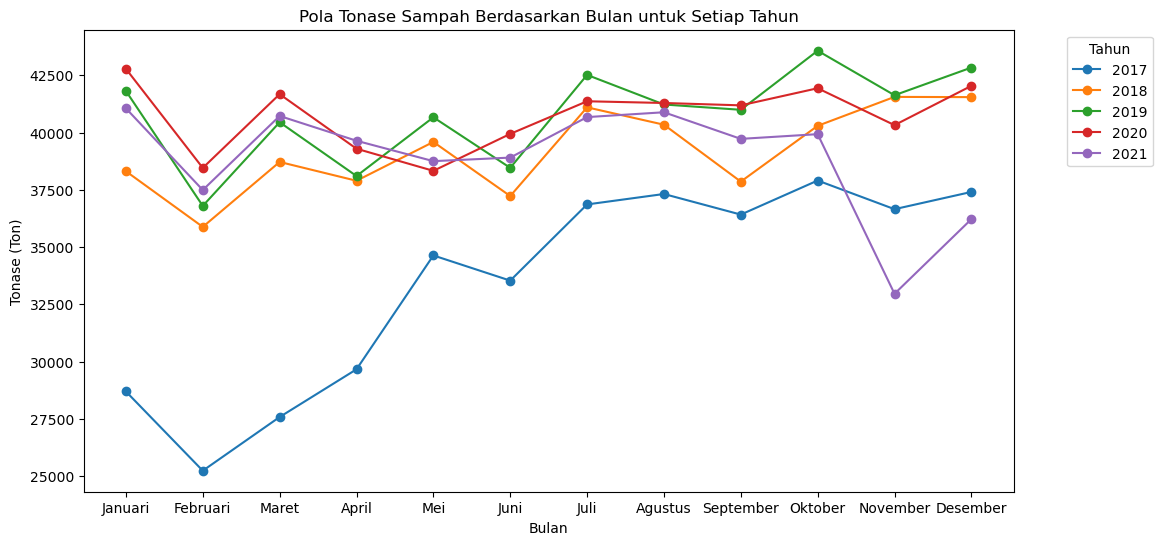

In [13]:
plt.figure(figsize=(12, 6))
for tahun, data_tahun in data_sampah.groupby('Tahun'):
    plt.plot(data_tahun['No'], data_tahun['Tonase (Ton)'], marker='o', linestyle='-', label=f"{tahun}")

plt.xlabel('Bulan')
plt.ylabel('Tonase (Ton)')
plt.title('Pola Tonase Sampah Berdasarkan Bulan untuk Setiap Tahun')
plt.xticks(data_tahun['No'], data_sampah['Bulan'].unique()) 
plt.legend(title='Tahun', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [14]:
# Memperlihatkan Puncak Tonase Yang terjadi pada tiap Tahun
puncak_tonase = data_sampah.loc[data_sampah.groupby('Tahun')['Tonase (Ton)'].idxmax()]
puncak = puncak_tonase[['Bulan', 'Tahun', 'Tonase (Ton)']]
puncak

,Bulan,Tahun,Tonase (Ton)
9,Oktober,2017,37908.640
22,November,2018,41560.446
33,Oktober,2019,43576.848
36,Januari,2020,42785.736
48,Januari,2021,41060.712


In [15]:
# Memperlihatkan Kenaikan Tonase Sampah tertinggi Yang terjadi pada tiap Tahun
kenaikan_tonase = data_sampah.loc[data_sampah.groupby('Tahun')['KenaikanPenurunanTonase (Ton)'].idxmax()]
kenaikan = kenaikan_tonase[['Bulan', 'Tahun', 'KenaikanPenurunanTonase (Ton)', 'KenaikanPenurunanTonase (%)']]
kenaikan

,Bulan,Tahun,KenaikanPenurunanTonase (Ton),KenaikanPenurunanTonase (%)
4,Mei,2017,4972.357,16.76
18,Juli,2018,3873.212,10.40
30,Juli,2019,4058.376,10.55
38,Maret,2020,3220.616,8.37
59,Desember,2021,3258.696,9.89


In [16]:
# Memperlihatkan Penurunan Tonase Sampah tertinggi Yang terjadi pada tiap Tahun
penurunan_tonase = data_sampah.loc[data_sampah.groupby('Tahun')['KenaikanPenurunanTonase (Ton)'].idxmin()]
penurunan = penurunan_tonase[['Bulan', 'Tahun', 'KenaikanPenurunanTonase (Ton)', 'KenaikanPenurunanTonase (%)']]
penurunan

,Bulan,Tahun,KenaikanPenurunanTonase (Ton),KenaikanPenurunanTonase (%)
1,Februari,2017,-3460.080,-12.06
20,September,2018,-2484.942,-6.16
25,Februari,2019,-5018.468,-12.00
37,Februari,2020,-4326.840,-10.11
58,November,2021,-6970.544,-17.46


Bagaimana Pola terkait Kompensasi Dampak Negatif Sampah yang terjadi pada Kota Bandung

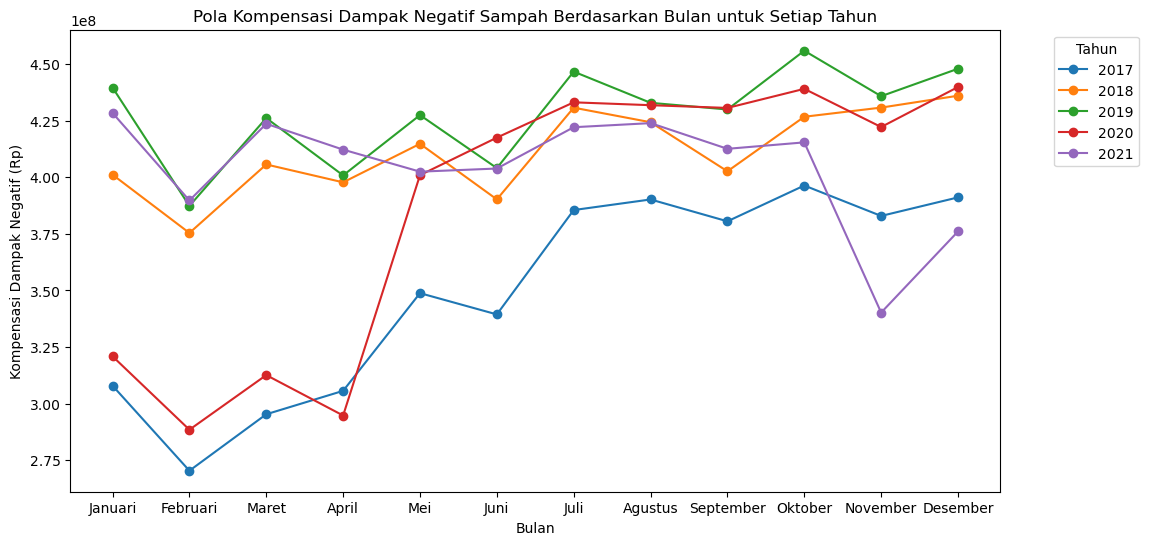

In [17]:
plt.figure(figsize=(12, 6))
for tahun, data_tahun in data_sampah.groupby('Tahun'):
    plt.plot(data_tahun['No'], data_tahun['Kompensasi Dampak Negatif (Rp)'], marker='o', linestyle='-', label=f"{tahun}")

plt.xlabel('Bulan')
plt.ylabel('Kompensasi Dampak Negatif (Rp)')
plt.title('Pola Kompensasi Dampak Negatif Sampah Berdasarkan Bulan untuk Setiap Tahun')
plt.xticks(data_tahun['No'], data_sampah['Bulan'].unique()) 
plt.legend(title='Tahun', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [18]:
# Memperlihatkan Puncak Kompensasi Dampak Negatif (Rp) Yang terjadi pada tiap Tahun
Dampak_Negatif = data_sampah.loc[data_sampah.groupby('Tahun')['Kompensasi Dampak Negatif (Rp)'].idxmax()]
kompensasi = Dampak_Negatif[['Bulan', 'Tahun', 'Tonase (Ton)', 'Kompensasi Dampak Negatif (Rp)']]
kompensasi

,Bulan,Tahun,Tonase (Ton),Kompensasi Dampak Negatif (Rp)
9,Oktober,2017,37908.640,396394800
23,Desember,2018,41550.608,436084560
33,Oktober,2019,43576.848,455976360
47,Desember,2020,42042.700,439925250
48,Januari,2021,41060.712,428465340


Faktor yang mempengaruhi Jumlah Kompensasi Jasa Pelayanan

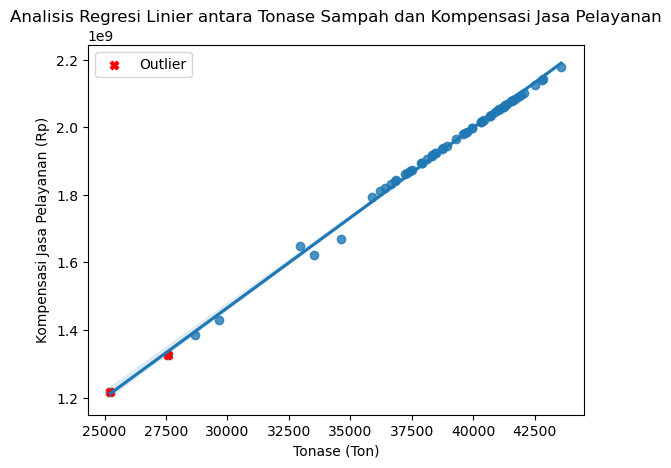

In [19]:
sns.regplot(x=data_sampah["Tonase (Ton)"], y=data_sampah["Kompensasi Jasa Pelayanan (Rp)"])
plt.title('Analisis Regresi Linier antara Tonase Sampah dan Kompensasi Jasa Pelayanan')
plt.xlabel('Tonase (Ton)')
plt.ylabel('Kompensasi Jasa Pelayanan (Rp)')
z_scores = np.abs(stats.zscore(data_sampah["Kompensasi Jasa Pelayanan (Rp)"]))
outliers = z_scores > 3  
plt.scatter(x=data_sampah["Tonase (Ton)"][outliers], y=data_sampah["Kompensasi Jasa Pelayanan (Rp)"][outliers],
            color='red', marker='X', label='Outlier')
plt.legend()
plt.show()

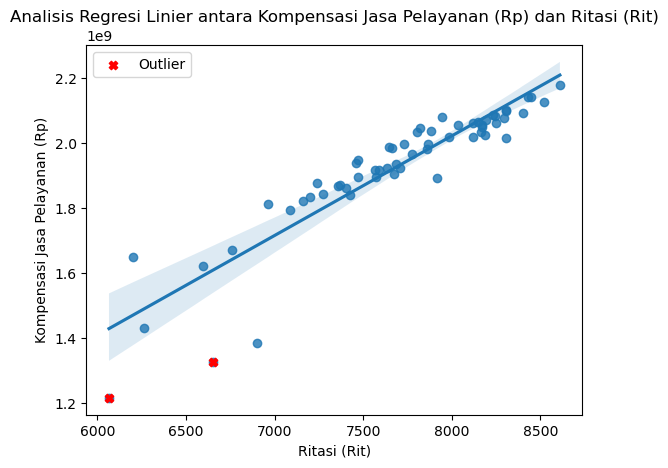

In [20]:
sns.regplot(x=data_sampah["Ritasi (Rit)"], y=data_sampah["Kompensasi Jasa Pelayanan (Rp)"])
plt.title('Analisis Regresi Linier antara Kompensasi Jasa Pelayanan (Rp) dan Ritasi (Rit)')
plt.xlabel('Ritasi (Rit)')
plt.ylabel('Kompensasi Jasa Pelayanan (Rp)')
z_scores = np.abs(stats.zscore(data_sampah["Kompensasi Jasa Pelayanan (Rp)"]))
outliers = z_scores > 3  
plt.scatter(x=data_sampah["Ritasi (Rit)"][outliers], y=data_sampah["Kompensasi Jasa Pelayanan (Rp)"][outliers],
            color='red', marker='X', label='Outlier')
plt.legend()
plt.show()

Hubungan Tonase Sampah dan Ritasi dan apakah ada outliers

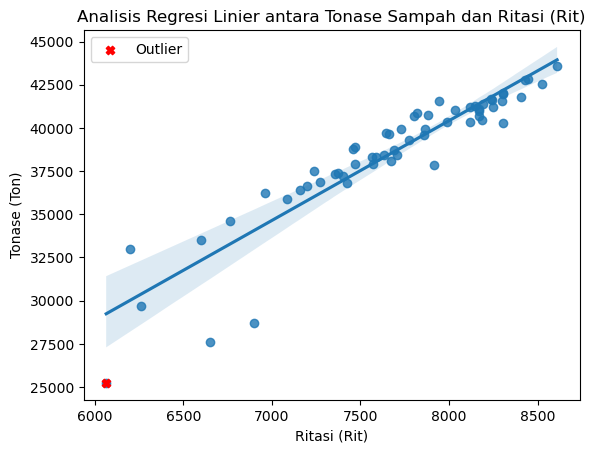

In [21]:
sns.regplot(x=data_sampah["Ritasi (Rit)"], y=data_sampah["Tonase (Ton)"])
plt.title('Analisis Regresi Linier antara Tonase Sampah dan Ritasi (Rit)')
plt.xlabel('Ritasi (Rit)')
plt.ylabel('Tonase (Ton)')
z_scores = np.abs(stats.zscore(data_sampah["Tonase (Ton)"]))
outliers = z_scores > 3 
plt.scatter(x=data_sampah["Ritasi (Rit)"][outliers], y=data_sampah["Tonase (Ton)"][outliers],
            color='red', marker='X', label='Outlier')
plt.legend()
plt.show()

Kesimpulan
1. Terdapat Dua bulan kemungkinan yang memiliki tonase sampah pada titik puncak atau sangat banyak sampah dibulan tersebut yaitu Oktober atau Januari
    Selain itu anomali terjadi pada Tahun 2018 dimana Bulan November Terjadi pemuncakan paling tinggi untuk jumlah tonase sampah di Bandung yang dimana pada tahun 2017,2019,2020,2021 dibulan November jumlah tonase sampah akan menurun setelah bulan Oktober.
2. Untuk Kenaikan Tonase sampah tertinggi terdapat pada Bulan Mei pada Tahun 2017 dengan kenaikan 16.76% dari bulan sebelumnya yaitu 4972.357 Ton sampah.
3. Penanganan Sampah di kota bandung sudah berhasil pada tahun 2021 mengefisiensikan pengeluaran sampah yang ada dimana pada Bulan November terdapat penurunan Tonase sampah sebanyak 17.46 % dengan pengurangan sampah sebesar 6970.544 Ton Sampah selain itu juga kenaikan Terbesarpun pada Desember 2021 ini hanya sebesar 9.89% atau naik sebesar 3258.696 Ton sampah.
4. Terdapat perbedaan pada Puncak Kompensasi Dampak Negatif (Rp) dengan Puncak Tonase sampah pada Tahun 2018 dan 2020 dimana Puncak Tonase sampah ditahun 2018 terdapat pada bulan November sedangkan pada tahun 2020 pada Bulan Januari akan tetapi Kompensasi yang didapatkan tidak lebih besar daripada Kompensasi Dampak Negatif akan Sampah yang ada pada tahun 2018 bulan Desember yang mendapatkan puncak kompensasi sebesar Rp 43.6084.560 dan pada Tahun 2020 bulan Desember lagi mendapatkan puncak kompensasi dampak negatif sebesar Rp 43.9925.250 . Selain tahun itu Kompensasi Dampak Negatif (Rp) sesuai dengan Tonase sampah yang dihasilkan karena sama sama pada titik puncak yang ada.
5. Feature Kompensasi Jasa Pelayanan (Rp) yang memiliki korelasi positive yang kuat dengan Tonase (Ton) dan Ritasi (Rit). Walaupun terdapat 2 outlier negatif dengan kata lain, kedua data tersebut memiliki nilai Tonase (Ton) atau Ritasi (Rit) yang lebih rendah dari nilai yang diharapkan berdasarkan hubungan linier dengan Kompensasi Jasa Pelayanan (Rp). Hal ini bisa ditinjau lebih lanjut untuk memahami penyebabnya.
Faktor ritasi memiliki pengaruh pada rentang rit sebesar 7000-8500 berdasarkan dengan Kompensasi Jasa Pelayanan (Rp)
Faktor Tonase (Ton) sampah memiliki pengaruh pada rentang sebesar 35000-45000 berdasarkan dengan Kompensasi Jasa Pelayanan (Rp)
6. Feature Tonase (Ton) yang memiliki korelasi positive yang kuat dengan Ritasi (Rit). Memiliki 1 outlier negatif dengan kata lain, kedua data tersebut memiliki nilai Ritasi (Rit) yang lebih rendah dari nilai yang diharapkan berdasarkan hubungan linier dengan Tonase (Ton).
Faktor ritasi memiliki pengaruh pada rentang rit sebesar 7000-8500 berdasarkan dengan Feature Tonase (Ton)

#### Export Dataset 
Untuk ditampilkan pada Streamlit

In [22]:
data_sampah.to_csv("dashboard/main_data.csv", index=False)